In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
import tensorflow as tf
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import multiprocess

%cd G:\My Drive

G:\My Drive


In [2]:
PATH = 'G:/My Drive/data/'
TRAIN_PATH = 'train/'

In [3]:
from PIL import Image, ImageOps
import os
import numpy as np
import re
import random

In [4]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128

In [5]:
def load_data(path, count, X, Y, filenames, index):
    cats = 0
    dogs = 0
    for i in range(index * count, (index + 1) * count):
        filename = filenames[i]
        try:
            if (filename.split('.')[0] == 'cat'):
                if (cats >= count / 2):
                    continue
                Y[i][0] = 1
                Y[i][1] = 0
                cats += 1
            else:
                if (dogs >= count / 2):
                    continue
                Y[i][0] = 0
                Y[i][1] = 1
                dogs += 1
            img = cv.imread(path + filename)

            #kmeans
            img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
            twoDimage = img.reshape((-1,3))
            twoDimage = np.float32(twoDimage)
            criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
            K = 2
            attempts=10
            ret,label,center=cv.kmeans(twoDimage,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
            center = np.uint8(center)
            res = center[label.flatten()]
            result_image = res.reshape((img.shape))
            img = result_image

            img = cv.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))

            for x in range(len(img)):
                for y in range(len(img[0])):
                    X[i][x][y] = img[x][y]
        except Exception as e:
            print(e);
            print('ERROR: failed to load data')
            print(i)
            continue
        if cats + dogs == count:
            break

In [6]:

 #Load the data
DATA_SIZE = 15000
filenames = os.listdir(PATH + TRAIN_PATH)
X = np.zeros((DATA_SIZE, IMAGE_WIDTH, IMAGE_HEIGHT, 3))
Y = np.zeros((DATA_SIZE, 2))
random.shuffle(filenames)
load_data(PATH + TRAIN_PATH, DATA_SIZE, X, Y, filenames, 0)

# Define training and testing data

In [7]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y)

print(len(x_train), len(x_test))

# Garbage collection
X = None
Y = None

11250 3750


In [8]:
x_train = np.asarray(x_train).astype(np.uint8) / 255
y_train = np.asarray(y_train).astype(np.uint8)
x_test = np.asarray(x_test).astype(np.uint8) / 255
y_test = np.asarray(y_test).astype(np.uint8)

In [9]:
EPOCHS = 30

In [10]:
input_shape = x_train[0].shape;

(128, 128, 3)


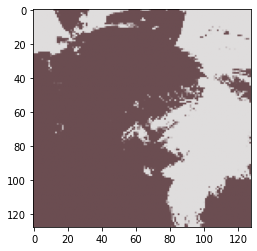

In [11]:
print(input_shape)
plt.imshow(x_train[1])

In [12]:
model = Sequential()
model.add(Conv2D(4, (3, 3), padding="same", activation="relu", input_shape=input_shape))
model.add(Conv2D(4, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

'''
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''

'''
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''

model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 4)       112       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 4)       148       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 4)      16        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 4)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 4)         0         
                                                                 
 flatten (Flatten)           (None, 16384)             0

In [13]:
model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_test, y_test), batch_size=16)

Epoch 1/30
704/704 [==============================] - 8s 9ms/step - loss: 0.8057 - accuracy: 0.5375 - val_loss: 0.6569 - val_accuracy: 0.6091
Epoch 2/30
704/704 [==============================] - 6s 8ms/step - loss: 0.6800 - accuracy: 0.5676 - val_loss: 0.6561 - val_accuracy: 0.6179
Epoch 3/30
704/704 [==============================] - 6s 8ms/step - loss: 0.6687 - accuracy: 0.5881 - val_loss: 0.6693 - val_accuracy: 0.5763
Epoch 4/30
704/704 [==============================] - 6s 8ms/step - loss: 0.6577 - accuracy: 0.6028 - val_loss: 0.6476 - val_accuracy: 0.6200
Epoch 5/30
704/704 [==============================] - 6s 8ms/step - loss: 0.6440 - accuracy: 0.6267 - val_loss: 0.6985 - val_accuracy: 0.5357
Epoch 6/30
704/704 [==============================] - 6s 8ms/step - loss: 0.6367 - accuracy: 0.6363 - val_loss: 0.6362 - val_accuracy: 0.6379
Epoch 7/30
704/704 [==============================] - 6s 8ms/step - loss: 0.6276 - accuracy: 0.6468 - val_loss: 0.6758 - val_accuracy: 0.5936
Epoch 

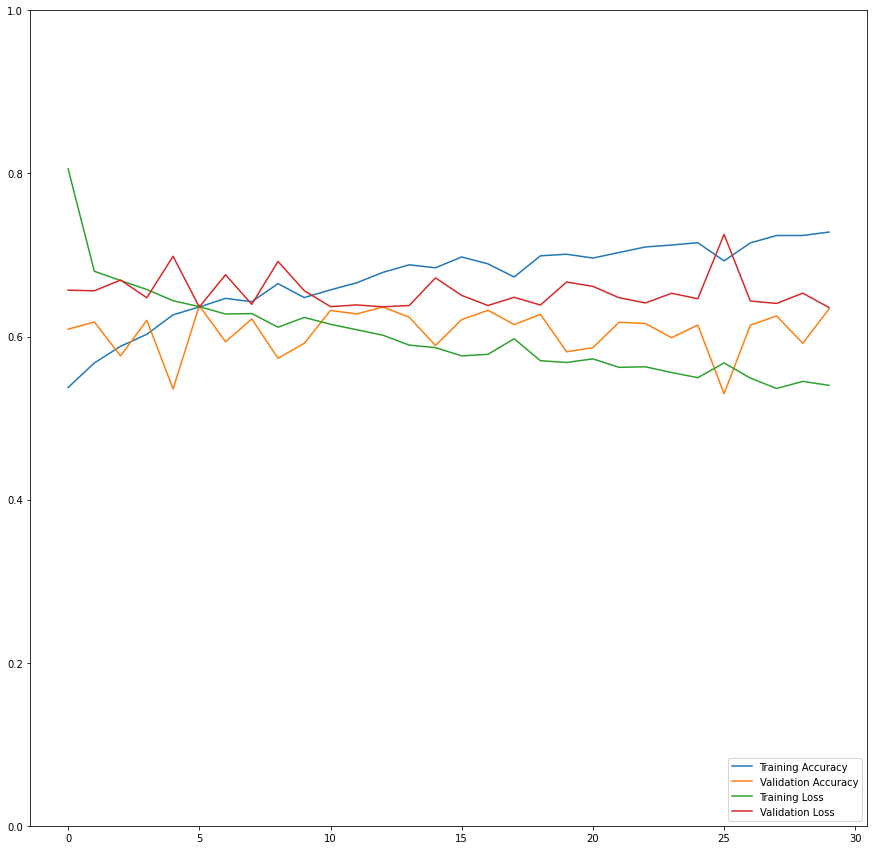

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 15))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('')
plt.ylim([0, 1])
plt.show()